<a href="https://colab.research.google.com/github/saloni-anand/hr-analytics/blob/main/hrfoxmula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT LIBRARIES**

In [4]:
import numpy as np
import pandas as pd

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC
from sklearn.metrics import log_loss, make_scorer
import math 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 

## **IMPORT**

In [5]:
generalData_df      =  pd.read_csv("general_data.csv")
employee_survey_df  =  pd.read_csv("employee_survey_data.csv")
manager_survey_df   =  pd.read_csv("manager_survey_data.csv")
intime_df           =  pd.read_csv("in_time.csv")
outtime_df          =  pd.read_csv("out_time.csv")

In [6]:
print(generalData_df.shape ,  employee_survey_df.shape ,  manager_survey_df.shape)
print(employee_survey_df.columns.tolist())
print(manager_survey_df.columns.tolist())

(4410, 24) (4410, 4) (4410, 3)
['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
['EmployeeID', 'JobInvolvement', 'PerformanceRating']


In [34]:
generalData_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [33]:
generalData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## **MERGE DATA**

In [8]:
df1=pd.merge(generalData_df,employee_survey_df,on='EmployeeID')
final_df=pd.merge(df1,manager_survey_df,on='EmployeeID')

if(len(final_df.columns.tolist())   == (len(generalData_df.columns.tolist()) + len(employee_survey_df.columns.tolist()) + len(manager_survey_df.columns.tolist())) - 2):
  print("OK")
  

OK


In [9]:
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [35]:
final_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,1.0,2211.695116,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,9.146517,8.097059,1.024774,0.0,1272.117692,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1110.750000,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2215.500000,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3314.250000,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## **finding nulls** 

In [36]:
final_df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [37]:
final_df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [38]:
print("nulls in final: {}".format(final_df.isnull().sum().sum()))
final_df.fillna(0,inplace =True)

nulls in final: 0


## **duplicate check**

In [19]:
final_df_duplicatedRows=final_df[final_df.duplicated(keep=False)].shape[0]
if(final_df_duplicatedRows==0):
  print("there is no duplicate elements in Final_df")
else:
  print("there is duplicate elements in Final_df")

there is no duplicate elements in Final_df


## **visualize**

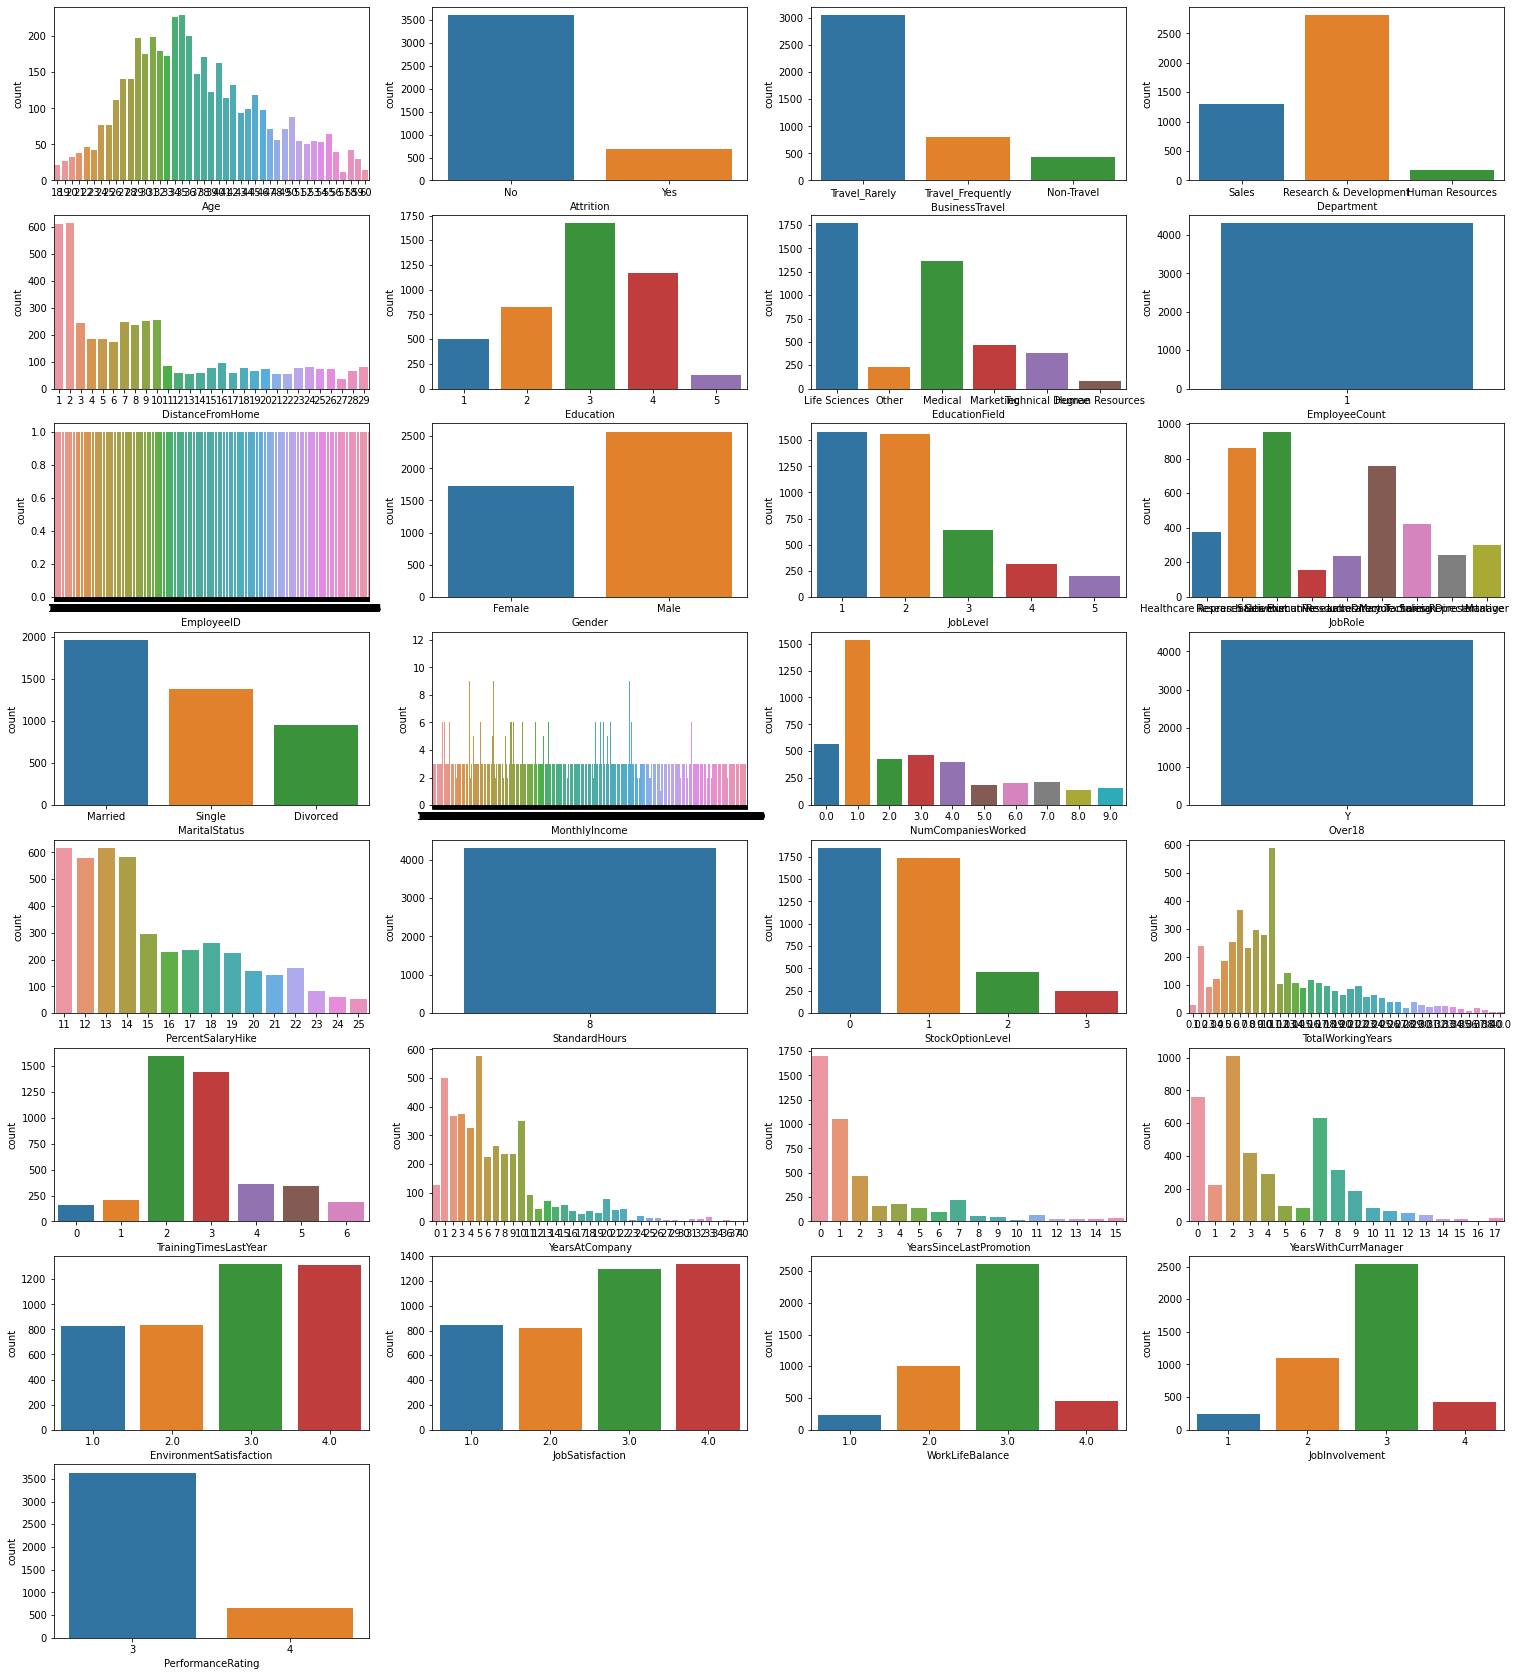

In [22]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(final_df.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=final_df,ax=ax)
plt.show()

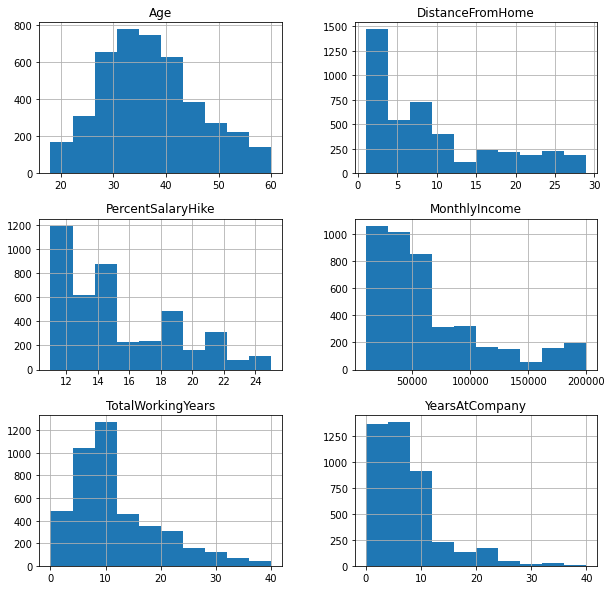

In [23]:
#Divide into NumericalColumns
columns=final_df.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
final_df[num_col_eda].hist(figsize=(10,10))
plt.show()

In [25]:
#Divide into CategoricalColumns
num_attrition=num_col_eda+['Attrition']
Education=['Below-College','College','Bachelor','Master','Doctor']
EnvironmentSatisfaction=['Low','Medium','High','Very High']
JobInvolvement=['Low','Medium','High','Very High']
JobSatisfaction=['Low','Medium','High','Very High']
RelationshipSatisfaction=['Low','Medium','High','Very High']
PerformanceRating=['Low','Good','Excellent','Outstanding']
WorkLifeBalance=['Bad','Good','Better','Best']

val=[Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,WorkLifeBalance]
cat1=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','WorkLifeBalance']

cat_col_eda=set(columns) - set(num_col_eda)
cat_col_eda=set(cat_col_eda) - set(cat1)
fig = plt.figure(figsize=(16,20))

<Figure size 1152x1440 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

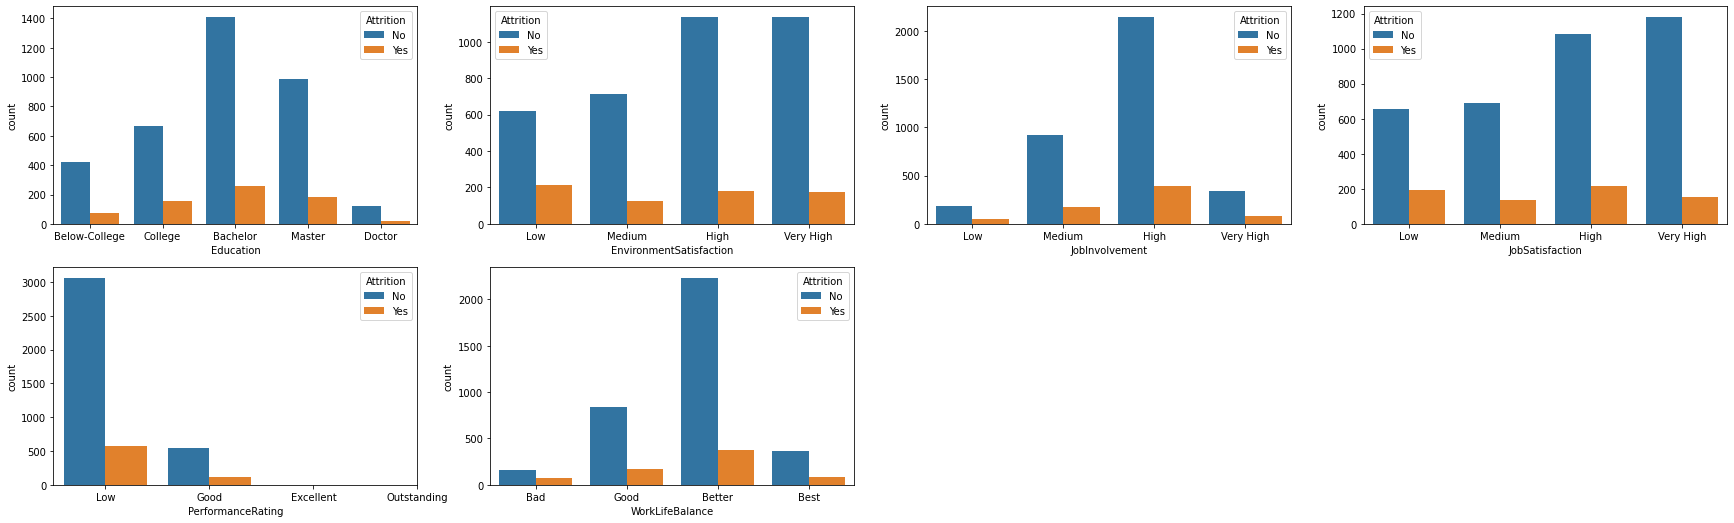

In [26]:
#2. chaning nums as x_ticks to   categorys as x_ticks
fig = plt.figure(figsize=(30,28))
for idx,i in enumerate(zip(cat1,val)):
    #crosstab = pd.crosstab(index=final_df[i[0]], columns=final_df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    #crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    sns.countplot(final_df[i[0]],hue=final_df['Attrition'],ax=ax)
    ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

## **correlation**

In [40]:
corr_cols = final_df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]


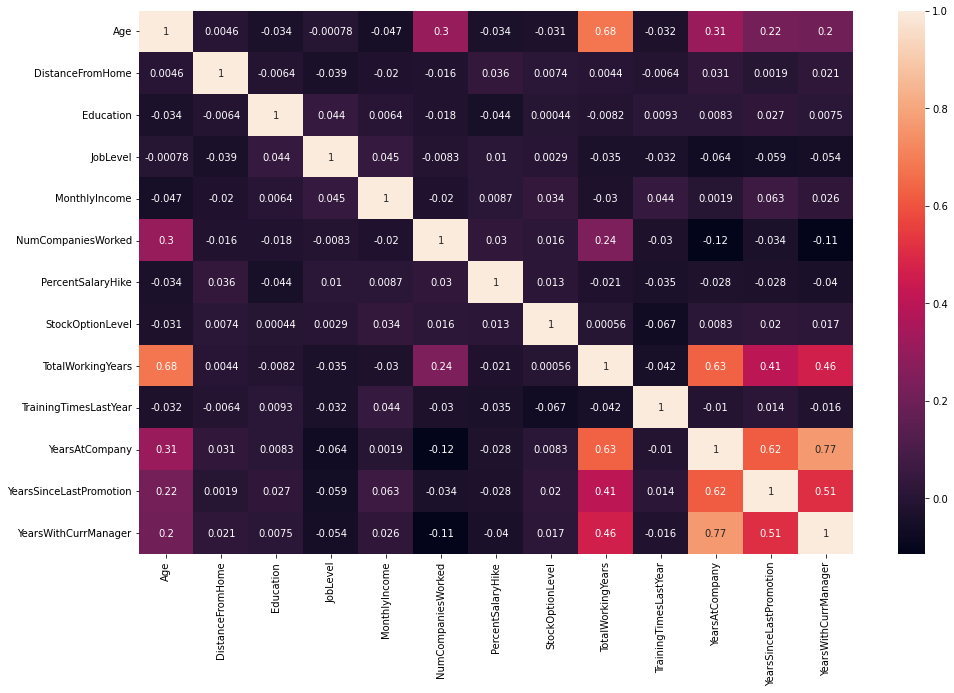

In [41]:
corr = corr_cols.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()


## **finding outlier**

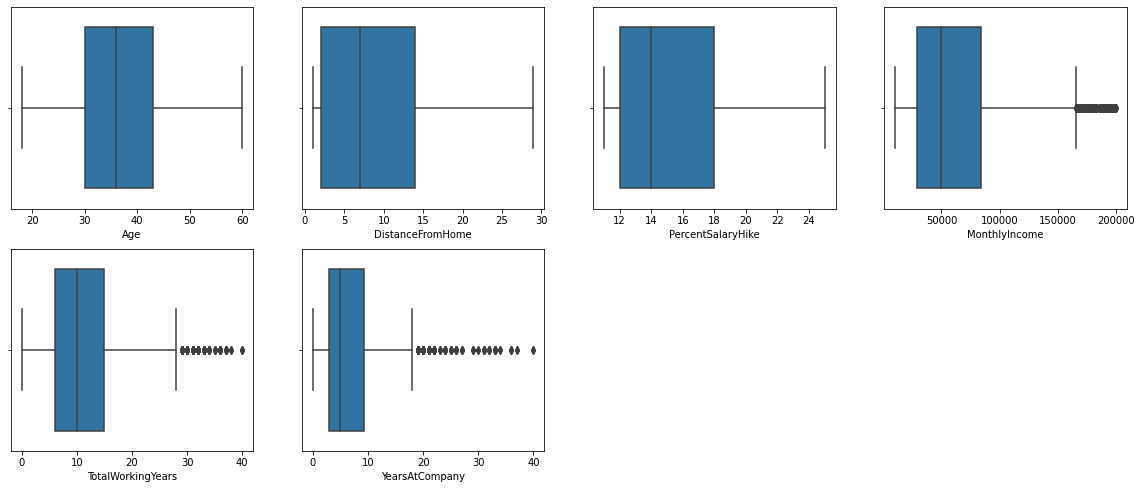

In [27]:
#Box Plot for finding "Outiler" in our data
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=final_df,ax=ax)

Results from Above Graph:
from above BoxPlot ,Trying to find is there any outliers in Numerical columns
can Observe outliers on MonthlyIncome , TotalWorkingYears and YearsAtCompany Columns
from observing on that columns can say those columns some of values not outliers Because there is highly possibilites on occuring those numerical values on those features or columns



In [42]:
print(len(final_df))
print(len(final_df[final_df['Attrition']=='Yes']))
print(len(final_df[final_df['Attrition']=='No']))
print("percentage of yes Attrition is:",(len(final_df[final_df['Attrition']=='Yes'])/len(final_df))*100,"%")
print("percentage of no Attrition is:",(len(final_df[final_df['Attrition']=='No'])/len(final_df))*100,"%")

4300
695
3605
percentage of yes Attrition is: 16.162790697674417 %
percentage of no Attrition is: 83.83720930232558 %


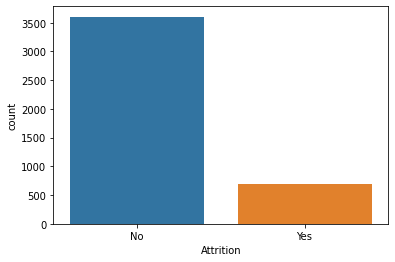

In [44]:
sns.countplot(x = "Attrition",data=final_df)
plt.show()

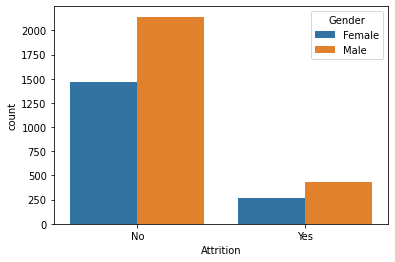

In [45]:
sns.countplot(x = "Attrition",data=final_df,hue="Gender")
plt.show()

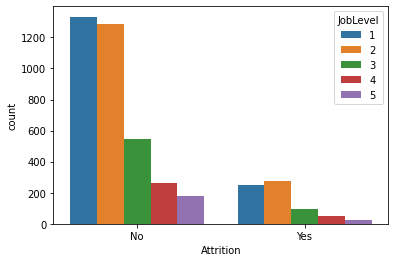

In [46]:
sns.countplot(x = "Attrition",data=final_df,hue="JobLevel")
plt.show()

## **training testing**

In [52]:
print(final_df['BusinessTravel'].unique())
print(final_df['EducationField'].unique())
print(final_df['Gender'].unique())
print(final_df['Department'].unique())
print(final_df['JobRole'].unique())
print(final_df['MaritalStatus'].unique())
print(final_df['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
X = final_df.drop('Attrition', axis = 1) #feature matrix
y = final_df.Attrition # target vector

In [89]:
# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

In [90]:
# creating logistic regression object
from sklearn.linear_model import LogisticRegression

# Logistic Regression

logreg = LogisticRegression()

In [91]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [92]:
# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV


In [93]:
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [94]:
# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [96]:
# calculate test score
from sklearn import metrics
model = model.best_estimator_.fit(X_train, y_train)


In [97]:
# predictions for test set
y_preds = model.predict(X_test)

test_accuracy_log = metrics.accuracy_score(y_test, y_preds)
test_recall_log = metrics.recall_score(y_test, y_preds)
print('Test Accuracy:', test_accuracy_log)
print('Test Sensitivity:', test_recall_log)

Test Accuracy: 0.8441860465116279
Test Sensitivity: 0.14388489208633093
